In [7]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 30
# pd.options.display.max_rows = 300
pd.options.display.precision = 5
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import os

In [8]:
import warnings 
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

### 1. *Reading/Understanding the Data*


In [9]:
df = pd.read_csv('Account_Sales.csv')

In [10]:
df.head(3)

,# Won Deals,Account ID,Account Name,Account Source,Account Type,Annual Revenue,Average Age,Average Deal Size,Billing Country,Billing State/Province,Created Date,Customer Priority,Days Since First Deal Close,Days Since Most Recent Deal Close,Employees,First Deal Date,Industry,Number of Locations,Owner ID,Product Rank,Top Product Family,Top Product Name,Top Product Total Price,Total Revenue
0,1,0015e000005ELNLAA4,Morton128 Inc,Web,Customer,1000000,1628.0,1415700,Japan,NaN,2019-05-06T17:23:31.000Z,NaN,-1378,-1378,5000,2021-10-20,Transportation,0,0055e000002OgRdAAK,1,Laptops,Notebook,1415700,1415700
1,1,0015e000005ELNPAA4,Cobb132 Inc,Employee Referral,Customer,1000000,1455.0,1411200,Taiwan,NaN,2019-05-06T17:23:31.000Z,NaN,-1205,-1205,5000,2021-04-30,Apparel,0,0055e000002OgRmAAK,1,Laptops,Mega laptop,1411200,1411200
2,1,0015e000005ELNTAA4,Thompson136 Inc,Web,Customer,1000000,1332.0,3428800,Thailand,NaN,2019-05-06T17:23:31.000Z,NaN,-1082,-1082,5000,2020-12-28,Energy,0,0055e000002OgRtAAK,1,Laptops,Light laptop,1726250,3428800


In [11]:
df[df['Billing Country']=='Singapore']['Total Revenue'].sum()

16774653

In [12]:
df[df['Billing Country']=='Canada']['Total Revenue'].sum()

106830303

In [13]:
# Shape of the Dataframe
df.shape

(308, 24)

In [14]:
# There are 24 columns in the dataset
df.columns.value_counts().sum()

24

In [15]:
# Information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   # Won Deals                        308 non-null    int64  
 1   Account ID                         308 non-null    object 
 2   Account Name                       308 non-null    object 
 3   Account Source                     308 non-null    object 
 4   Account Type                       308 non-null    object 
 5   Annual Revenue                     308 non-null    int64  
 6   Average Age                        308 non-null    float64
 7   Average Deal Size                  308 non-null    int64  
 8   Billing Country                    308 non-null    object 
 9   Billing State/Province             130 non-null    object 
 10  Created Date                       308 non-null    object 
 11  Customer Priority                  0 non-null      float64

In [16]:
# The whole dtypes
df.dtypes

# Won Deals                            int64
Account ID                            object
Account Name                          object
Account Source                        object
Account Type                          object
Annual Revenue                         int64
Average Age                          float64
Average Deal Size                      int64
Billing Country                       object
Billing State/Province                object
Created Date                          object
Customer Priority                    float64
Days Since First Deal Close            int64
Days Since Most Recent Deal Close      int64
Employees                              int64
First Deal Date                       object
Industry                              object
Number of Locations                    int64
Owner ID                              object
Product Rank                           int64
Top Product Family                    object
Top Product Name                      object
Top Produc

In [17]:
# dtypes that are numeric
df.select_dtypes(include=['number'])

,# Won Deals,Annual Revenue,Average Age,Average Deal Size,Customer Priority,Days Since First Deal Close,Days Since Most Recent Deal Close,Employees,Number of Locations,Product Rank,Top Product Total Price,Total Revenue
0,1,1000000,1628.0,1415700,NaN,-1378,-1378,5000,0,1,1415700,1415700
1,1,1000000,1455.0,1411200,NaN,-1205,-1205,5000,0,1,1411200,1411200
2,1,1000000,1332.0,3428800,NaN,-1082,-1082,5000,0,1,1726250,3428800
3,1,1000000,1635.0,1817900,NaN,-1385,-1385,5000,0,1,1307500,1817900
4,1,1000000,1515.0,3251640,NaN,-1265,-1265,5000,0,1,2430400,3251640
...,...,...,...,...,...,...,...,...,...,...,...,...
303,1,2000000,1232.0,89320,NaN,-982,-982,1100,0,1,89320,89320
304,1,2000000,1364.0,874780,NaN,-1114,-1114,1100,0,1,644500,874780
305,1,2000000,1290.0,638750,NaN,-1040,-1040,1100,0,1,638750,638750
306,1,2000000,1483.0,1193160,NaN,-1233,-1233,1100,0,1,1190000,1193160


In [18]:
# dtypes that are 'objects'
df.select_dtypes(include=['object'])

,Account ID,Account Name,Account Source,Account Type,Billing Country,Billing State/Province,Created Date,First Deal Date,Industry,Owner ID,Top Product Family,Top Product Name
0,0015e000005ELNLAA4,Morton128 Inc,Web,Customer,Japan,NaN,2019-05-06T17:23:31.000Z,2021-10-20,Transportation,0055e000002OgRdAAK,Laptops,Notebook
1,0015e000005ELNPAA4,Cobb132 Inc,Employee Referral,Customer,Taiwan,NaN,2019-05-06T17:23:31.000Z,2021-04-30,Apparel,0055e000002OgRmAAK,Laptops,Mega laptop
2,0015e000005ELNTAA4,Thompson136 Inc,Web,Customer,Thailand,NaN,2019-05-06T17:23:31.000Z,2020-12-28,Energy,0055e000002OgRtAAK,Laptops,Light laptop
3,0015e000005ELNUAA4,Ramirez137 Inc,Employee Referral,Customer,Japan,NaN,2019-05-06T17:23:31.000Z,2021-10-27,Electronics,0055e000002OgRmAAK,Laptops,Light laptop
4,0015e000005ELNbAAO,Quinn144 Inc,Employee Referral,Customer,Brazil,NaN,2019-05-06T17:23:31.000Z,2021-06-29,Engineering,0055e000002OgRtAAK,Laptops,Mega laptop
...,...,...,...,...,...,...,...,...,...,...,...,...
303,0015e000005ELd3AAG,Collins928 Inc,Advertisement,Customer,Singapore,NaN,2019-05-06T17:23:31.000Z,2020-09-19,Apparel,0055e000002OgRnAAK,Accessories,Cables
304,0015e000005ELd9AAG,Brewer934 Inc,Partner,Customer,Brazil,NaN,2019-05-06T17:23:31.000Z,2021-01-29,Insurance,0055e000002OgReAAK,Phones,Space phone 3
305,0015e000005ELdBAAW,Mendoza936 Inc,Trade Show,Customer,China,NaN,2019-05-06T17:23:31.000Z,2020-11-16,Telecommunications,0055e000002OgRdAAK,Laptops,Light laptop
306,0015e000005ELdCAAW,Glover937 Inc,Employee Referral,Customer,USA,AZ,2019-05-06T17:23:31.000Z,2021-05-28,Agriculture,0055e000002OgRhAAK,Laptops,Pro laptop


In [19]:
# Descriptive Statistics
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
# Won Deals,308.0,1.26623e+00,5.17350e-01,1.0,1.00,1.0,1.00000e+00,3.00000e+00
Annual Revenue,308.0,1.55656e+08,2.90221e+08,500000.0,1000000.00,2000000.0,2.00000e+06,7.00000e+08
Average Age,308.0,1.46414e+03,1.09730e+02,1205.0,1390.50,1472.0,1.55362e+03,1.64300e+03
Average Deal Size,308.0,1.04467e+06,1.10888e+06,5280.0,211139.50,661268.5,1.44190e+06,7.74719e+06
Customer Priority,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Days Since First Deal Close,308.0,-1.19531e+03,1.22888e+02,-1393.0,-1297.25,-1206.5,-1.08275e+03,-9.46000e+02
Days Since Most Recent Deal Close,308.0,-1.23303e+03,1.14349e+02,-1395.0,-1329.00,-1250.0,-1.16825e+03,-9.55000e+02
Employees,308.0,4.88864e+03,3.64844e+03,400.0,1000.00,4000.0,8.00000e+03,1.00000e+04
Number of Locations,308.0,0.00000e+00,0.00000e+00,0.0,0.00,0.0,0.00000e+00,0.00000e+00
Product Rank,308.0,8.60390e-01,3.47146e-01,0.0,1.00,1.0,1.00000e+00,1.00000e+00


In [20]:
df['Total Revenue'].describe()

count    3.08000e+02
mean     1.35924e+06
std      1.49242e+06
min      5.28000e+03
25%      2.30258e+05
50%      7.88018e+05
75%      2.16957e+06
max      7.74719e+06
Name: Total Revenue, dtype: float64

The distance from the min to the 25th percentile has a huge difference, which is larger than the 75th percentile vs max. The data might not be normally distributed, but will be checked for normality using log transformation later on.

In [21]:
# Percentage of NaN values in the dataset
df.isnull().sum()/len(df)

# Won Deals                          0.00000
Account ID                           0.00000
Account Name                         0.00000
Account Source                       0.00000
Account Type                         0.00000
Annual Revenue                       0.00000
Average Age                          0.00000
Average Deal Size                    0.00000
Billing Country                      0.00000
Billing State/Province               0.57792
Created Date                         0.00000
Customer Priority                    1.00000
Days Since First Deal Close          0.00000
Days Since Most Recent Deal Close    0.00000
Employees                            0.00000
First Deal Date                      0.00000
Industry                             0.00000
Number of Locations                  0.00000
Owner ID                             0.00000
Product Rank                         0.00000
Top Product Family                   0.13961
Top Product Name                     0.13961
Top Produc

In [22]:
# We have 0 duplicates in our dataframe
df.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'# Won Deals'}>,
        <AxesSubplot:title={'center':'Annual Revenue'}>,
        <AxesSubplot:title={'center':'Average Age'}>],
       [<AxesSubplot:title={'center':'Average Deal Size'}>,
        <AxesSubplot:title={'center':'Customer Priority'}>,
        <AxesSubplot:title={'center':'Days Since First Deal Close'}>],
       [<AxesSubplot:title={'center':'Days Since Most Recent Deal Close'}>,
        <AxesSubplot:title={'center':'Employees'}>,
        <AxesSubplot:title={'center':'Number of Locations'}>],
       [<AxesSubplot:title={'center':'Product Rank'}>,
        <AxesSubplot:title={'center':'Top Product Total Price'}>,
        <AxesSubplot:title={'center':'Total Revenue'}>]], dtype=object)

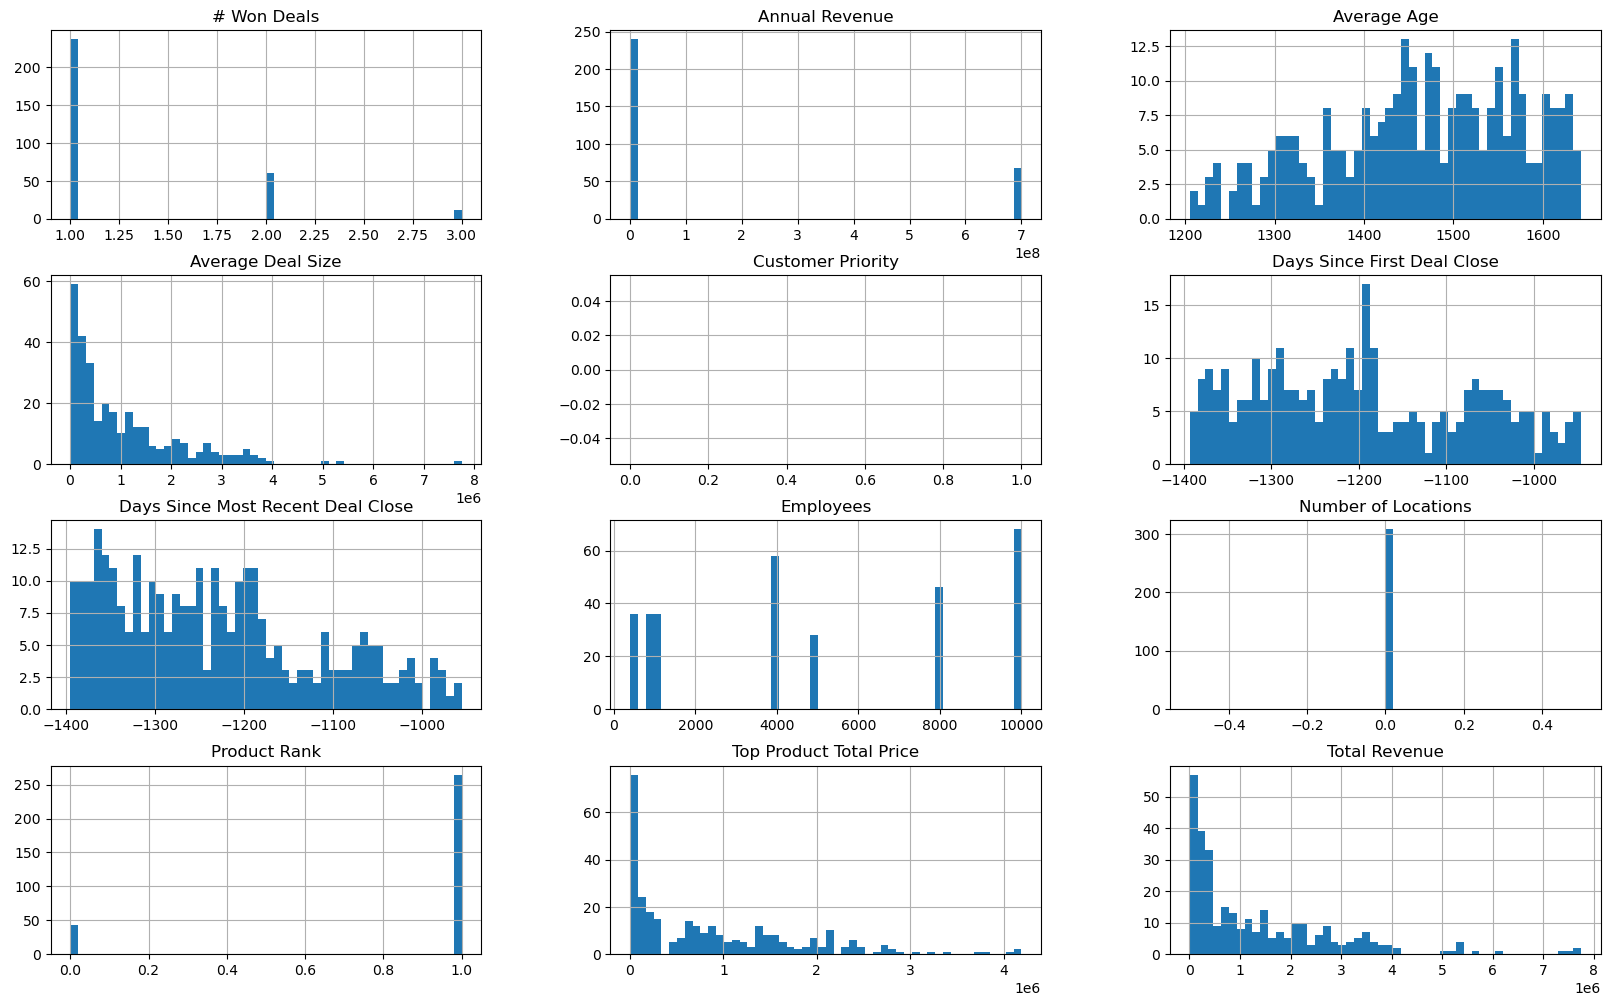

In [23]:
df.hist(bins=50, figsize=(20,12))

### 2. *Data Preparation*

We're looking for "Total Revenue" as our predicted output, so we use the seaborn visualization for correlation

In [24]:
# Pearson Coefficient of the correlation of the 'Total Revenue'
df.corr()['Total Revenue'].sort_values(ascending=False)

Total Revenue                        1.00000
Top Product Total Price              0.88648
Average Deal Size                    0.87630
# Won Deals                          0.44836
Product Rank                         0.29716
Days Since First Deal Close          0.15834
Employees                            0.10058
Annual Revenue                       0.05735
Average Age                         -0.03167
Days Since Most Recent Deal Close   -0.11360
Customer Priority                        NaN
Number of Locations                      NaN
Name: Total Revenue, dtype: float64

In [25]:
df.head(2)

,# Won Deals,Account ID,Account Name,Account Source,Account Type,Annual Revenue,Average Age,Average Deal Size,Billing Country,Billing State/Province,Created Date,Customer Priority,Days Since First Deal Close,Days Since Most Recent Deal Close,Employees,First Deal Date,Industry,Number of Locations,Owner ID,Product Rank,Top Product Family,Top Product Name,Top Product Total Price,Total Revenue
0,1,0015e000005ELNLAA4,Morton128 Inc,Web,Customer,1000000,1628.0,1415700,Japan,NaN,2019-05-06T17:23:31.000Z,NaN,-1378,-1378,5000,2021-10-20,Transportation,0,0055e000002OgRdAAK,1,Laptops,Notebook,1415700,1415700
1,1,0015e000005ELNPAA4,Cobb132 Inc,Employee Referral,Customer,1000000,1455.0,1411200,Taiwan,NaN,2019-05-06T17:23:31.000Z,NaN,-1205,-1205,5000,2021-04-30,Apparel,0,0055e000002OgRmAAK,1,Laptops,Mega laptop,1411200,1411200


Filtering out what features seems relevant 

In [26]:
df1 = df[['# Won Deals', 
    # 'Account ID', 'Account Name',
    'Account Source',
    'Account Type', 'Annual Revenue', 'Average Age', 'Average Deal Size',
    'Billing Country', 
   'Billing State/Province', 
    # 'Created Date',
    'Customer Priority', 
    'Days Since First Deal Close', 'Days Since Most Recent Deal Close', 
    'Employees', 
    'First Deal Date', 'Industry', 
    'Number of Locations',
    'Owner ID',
    'Product Rank',
    'Top Product Family', 
    'Top Product Name', 
    'Top Product Total Price',
    'Total Revenue']]

In [27]:
df1

,# Won Deals,Account Source,Account Type,Annual Revenue,Average Age,Average Deal Size,Billing Country,Billing State/Province,Customer Priority,Days Since First Deal Close,Days Since Most Recent Deal Close,Employees,First Deal Date,Industry,Number of Locations,Owner ID,Product Rank,Top Product Family,Top Product Name,Top Product Total Price,Total Revenue
0,1,Web,Customer,1000000,1628.0,1415700,Japan,NaN,NaN,-1378,-1378,5000,2021-10-20,Transportation,0,0055e000002OgRdAAK,1,Laptops,Notebook,1415700,1415700
1,1,Employee Referral,Customer,1000000,1455.0,1411200,Taiwan,NaN,NaN,-1205,-1205,5000,2021-04-30,Apparel,0,0055e000002OgRmAAK,1,Laptops,Mega laptop,1411200,1411200
2,1,Web,Customer,1000000,1332.0,3428800,Thailand,NaN,NaN,-1082,-1082,5000,2020-12-28,Energy,0,0055e000002OgRtAAK,1,Laptops,Light laptop,1726250,3428800
3,1,Employee Referral,Customer,1000000,1635.0,1817900,Japan,NaN,NaN,-1385,-1385,5000,2021-10-27,Electronics,0,0055e000002OgRmAAK,1,Laptops,Light laptop,1307500,1817900
4,1,Employee Referral,Customer,1000000,1515.0,3251640,Brazil,NaN,NaN,-1265,-1265,5000,2021-06-29,Engineering,0,0055e000002OgRtAAK,1,Laptops,Mega laptop,2430400,3251640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,1,Advertisement,Customer,2000000,1232.0,89320,Singapore,NaN,NaN,-982,-982,1100,2020-09-19,Apparel,0,0055e000002OgRnAAK,1,Accessories,Cables,89320,89320
304,1,Partner,Customer,2000000,1364.0,874780,Brazil,NaN,NaN,-1114,-1114,1100,2021-01-29,Insurance,0,0055e000002OgReAAK,1,Phones,Space phone 3,644500,874780
305,1,Trade Show,Customer,2000000,1290.0,638750,China,NaN,NaN,-1040,-1040,1100,2020-11-16,Telecommunications,0,0055e000002OgRdAAK,1,Laptops,Light laptop,638750,638750
306,1,Employee Referral,Customer,2000000,1483.0,1193160,USA,AZ,NaN,-1233,-1233,1100,2021-05-28,Agriculture,0,0055e000002OgRhAAK,1,Laptops,Pro laptop,1190000,1193160


----------------------------------------------SCRATCH WORK---------------------------------------------------

The features below are just scratch work to find what features to select. Most features that are commented out might be interesting to look at later.

In [28]:
print(df['# Won Deals'].unique())

[1 2 3]


In [29]:
# Useful as Categorical Attributes
print(df['Account Type'].unique())
print(df['Billing Country'].unique())
print(df['Industry'].unique())

['Customer' 'Partner']
['Japan' 'Taiwan' 'Thailand' 'Brazil' 'Canada' 'USA' 'Korea' 'France'
 'India' 'Normway' 'Hong Kong' 'Germany' 'United Kingdom' 'Switzerland'
 'Denmark' 'Mexico' 'Italy' 'Sweden' 'Russian' 'Singapore' 'Belgium'
 'Turkey' 'China' 'Australia' 'Spain']
['Transportation' 'Apparel' 'Energy' 'Electronics' 'Engineering'
 'Insurance' 'Biotechnology' 'Education' 'Technology' 'Finance' 'Retail'
 'Banking' 'Manufacturing' 'Telecommunications' 'Consulting' 'Utilities'
 'Media' 'Communications' 'Healthcare' 'Agriculture']


In [30]:
#Not really useful if all the values are 0
print(df['Number of Locations'].unique())

[0]


In [31]:
df['Owner ID'].unique()

array(['0055e000002OgRdAAK', '0055e000002OgRmAAK', '0055e000002OgRtAAK',
       '0055e000002OgRiAAK', '0055e000002OgReAAK', '0055e000002OgRrAAK',
       '0055e000002OgRsAAK', '0055e000002OgRpAAK', '0055e000002OgRcAAK',
       '0055e000002OgRhAAK', '0055e000002OgRnAAK', '0055e000002OgRlAAK',
       '0055e000002OgRfAAK', '0055e000002OgRuAAK', '0055e000002OgRkAAK',
       '0055e000002OgRqAAK', '0055e000002OgRgAAK', '0055e000002OgRjAAK'],
      dtype=object)

In [32]:
#REPLACE NAN with 'OTHERS'.. Looks useful for visualization 
print(df['Top Product Family'].unique())

['Laptops' 'Tablets' 'Digital Media' 'Phones' nan 'Accessories']


In [33]:
#Top Product Family should be good enough to find sales of different tech sectors
print(df['Top Product Name'].unique())

['Notebook' 'Mega laptop' 'Light laptop' 'Light tablet 2' 'Books'
 'Courses' 'Space phone 3' 'Certifications' 'Pro laptop' 'Space phone 2'
 'Mini tablet 2' nan 'Keyboard' 'Mouse' 'Light tablet' 'Cables'
 'Mini tablet' 'Cases']


--------------------------------------------END OF SCRATCH WORK---------------------------------------------------

Reviewing the new dataframe again...

In [34]:
df1.dtypes

# Won Deals                            int64
Account Source                        object
Account Type                          object
Annual Revenue                         int64
Average Age                          float64
Average Deal Size                      int64
Billing Country                       object
Billing State/Province                object
Customer Priority                    float64
Days Since First Deal Close            int64
Days Since Most Recent Deal Close      int64
Employees                              int64
First Deal Date                       object
Industry                              object
Number of Locations                    int64
Owner ID                              object
Product Rank                           int64
Top Product Family                    object
Top Product Name                      object
Top Product Total Price                int64
Total Revenue                          int64
dtype: object

In [35]:
print(df1.shape)

(308, 21)


In [36]:
df1.isnull().sum()

# Won Deals                            0
Account Source                         0
Account Type                           0
Annual Revenue                         0
Average Age                            0
Average Deal Size                      0
Billing Country                        0
Billing State/Province               178
Customer Priority                    308
Days Since First Deal Close            0
Days Since Most Recent Deal Close      0
Employees                              0
First Deal Date                        0
Industry                               0
Number of Locations                    0
Owner ID                               0
Product Rank                           0
Top Product Family                    43
Top Product Name                      43
Top Product Total Price                0
Total Revenue                          0
dtype: int64

In [37]:
df1.corr()['Total Revenue'].sort_values(ascending=False)

Total Revenue                        1.00000
Top Product Total Price              0.88648
Average Deal Size                    0.87630
# Won Deals                          0.44836
Product Rank                         0.29716
Days Since First Deal Close          0.15834
Employees                            0.10058
Annual Revenue                       0.05735
Average Age                         -0.03167
Days Since Most Recent Deal Close   -0.11360
Customer Priority                        NaN
Number of Locations                      NaN
Name: Total Revenue, dtype: float64

In [38]:
df1.head(3)

,# Won Deals,Account Source,Account Type,Annual Revenue,Average Age,Average Deal Size,Billing Country,Billing State/Province,Customer Priority,Days Since First Deal Close,Days Since Most Recent Deal Close,Employees,First Deal Date,Industry,Number of Locations,Owner ID,Product Rank,Top Product Family,Top Product Name,Top Product Total Price,Total Revenue
0,1,Web,Customer,1000000,1628.0,1415700,Japan,NaN,NaN,-1378,-1378,5000,2021-10-20,Transportation,0,0055e000002OgRdAAK,1,Laptops,Notebook,1415700,1415700
1,1,Employee Referral,Customer,1000000,1455.0,1411200,Taiwan,NaN,NaN,-1205,-1205,5000,2021-04-30,Apparel,0,0055e000002OgRmAAK,1,Laptops,Mega laptop,1411200,1411200
2,1,Web,Customer,1000000,1332.0,3428800,Thailand,NaN,NaN,-1082,-1082,5000,2020-12-28,Energy,0,0055e000002OgRtAAK,1,Laptops,Light laptop,1726250,3428800


### 3. *Feature Engineering*

The First Deal Date has date dtype as an object... We convert to datetime64 and extract the 'Year' and 'Month' to add to dataframe

In [39]:
# The First Deal Date has date dtype as an object... We convert to 
df1['First Deal Date'] = pd.to_datetime(df1['First Deal Date'], format = '%Y-%m')
df1['First Deal Year'] = df1['First Deal Date'].dt.year
df1['First Deal Month'] = df1['First Deal Date'].dt.month
df1 = df1.drop('First Deal Date', axis=1)

In [40]:
df1.dtypes

# Won Deals                            int64
Account Source                        object
Account Type                          object
Annual Revenue                         int64
Average Age                          float64
Average Deal Size                      int64
Billing Country                       object
Billing State/Province                object
Customer Priority                    float64
Days Since First Deal Close            int64
Days Since Most Recent Deal Close      int64
Employees                              int64
Industry                              object
Number of Locations                    int64
Owner ID                              object
Product Rank                           int64
Top Product Family                    object
Top Product Name                      object
Top Product Total Price                int64
Total Revenue                          int64
First Deal Year                        int64
First Deal Month                       int64
dtype: obj

We replace NaN as 'Others' so we can one-hot encode later on for categorical attributes for the 'Top Product Family' and 'Top Product Name'

In [41]:
df1['Top Product Family'] = df1['Top Product Family'].replace(np.nan,'Others_Family')
print(df1['Top Product Family'].unique())

['Laptops' 'Tablets' 'Digital Media' 'Phones' 'Others_Family'
 'Accessories']


In [42]:
df1['Top Product Name'] = df1['Top Product Name'].replace(np.nan,'Others_Product')

In [43]:
df1['Billing State/Province'] = df1['Billing State/Province'].replace(np.nan,'NON-US')

In [44]:
# We can see we have fixed the missing data and captured the main features to process for the prediction model
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   # Won Deals                        308 non-null    int64  
 1   Account Source                     308 non-null    object 
 2   Account Type                       308 non-null    object 
 3   Annual Revenue                     308 non-null    int64  
 4   Average Age                        308 non-null    float64
 5   Average Deal Size                  308 non-null    int64  
 6   Billing Country                    308 non-null    object 
 7   Billing State/Province             308 non-null    object 
 8   Customer Priority                  0 non-null      float64
 9   Days Since First Deal Close        308 non-null    int64  
 10  Days Since Most Recent Deal Close  308 non-null    int64  
 11  Employees                          308 non-null    int64  

In [45]:
df1.isnull().sum()

# Won Deals                            0
Account Source                         0
Account Type                           0
Annual Revenue                         0
Average Age                            0
Average Deal Size                      0
Billing Country                        0
Billing State/Province                 0
Customer Priority                    308
Days Since First Deal Close            0
Days Since Most Recent Deal Close      0
Employees                              0
Industry                               0
Number of Locations                    0
Owner ID                               0
Product Rank                           0
Top Product Family                     0
Top Product Name                       0
Top Product Total Price                0
Total Revenue                          0
First Deal Year                        0
First Deal Month                       0
dtype: int64

We don't know which customers are priority, so we'll drop it from the dataframe

In [46]:
df1 = df1.drop('Customer Priority', axis=1)

In [47]:
df1.corr()['Total Revenue'].sort_values(ascending=False)

Total Revenue                        1.00000
Top Product Total Price              0.88648
Average Deal Size                    0.87630
# Won Deals                          0.44836
Product Rank                         0.29716
Days Since First Deal Close          0.15834
Employees                            0.10058
Annual Revenue                       0.05735
First Deal Month                     0.00308
Average Age                         -0.03167
Days Since Most Recent Deal Close   -0.11360
First Deal Year                     -0.12445
Number of Locations                      NaN
Name: Total Revenue, dtype: float64

In [48]:
df1['Number of Locations'].unique()

array([0], dtype=int64)

In [49]:
df1 = df1.drop('Number of Locations', axis=1)

In [50]:
df1.head(2)

,# Won Deals,Account Source,Account Type,Annual Revenue,Average Age,Average Deal Size,Billing Country,Billing State/Province,Days Since First Deal Close,Days Since Most Recent Deal Close,Employees,Industry,Owner ID,Product Rank,Top Product Family,Top Product Name,Top Product Total Price,Total Revenue,First Deal Year,First Deal Month
0,1,Web,Customer,1000000,1628.0,1415700,Japan,NON-US,-1378,-1378,5000,Transportation,0055e000002OgRdAAK,1,Laptops,Notebook,1415700,1415700,2021,10
1,1,Employee Referral,Customer,1000000,1455.0,1411200,Taiwan,NON-US,-1205,-1205,5000,Apparel,0055e000002OgRmAAK,1,Laptops,Mega laptop,1411200,1411200,2021,4


In [51]:
df1['Average Age'] = df['Average Age'].astype(int)

In [52]:
df['Average Age'].astype(int)

0      1628
1      1455
2      1332
3      1635
4      1515
       ... 
303    1232
304    1364
305    1290
306    1483
307    1399
Name: Average Age, Length: 308, dtype: int32

In [53]:
# Only useful if you're selectively looking in the US, we can use Billing Country instead.
df1 = df1.drop('Billing State/Province',axis=1)

In [54]:
# We can probably drop the Product Name and only use the Top Product Family feature, since it's too selective.
df1 = df1.drop('Top Product Name', axis=1)

In [55]:
df1.head(2)

,# Won Deals,Account Source,Account Type,Annual Revenue,Average Age,Average Deal Size,Billing Country,Days Since First Deal Close,Days Since Most Recent Deal Close,Employees,Industry,Owner ID,Product Rank,Top Product Family,Top Product Total Price,Total Revenue,First Deal Year,First Deal Month
0,1,Web,Customer,1000000,1628,1415700,Japan,-1378,-1378,5000,Transportation,0055e000002OgRdAAK,1,Laptops,1415700,1415700,2021,10
1,1,Employee Referral,Customer,1000000,1455,1411200,Taiwan,-1205,-1205,5000,Apparel,0055e000002OgRmAAK,1,Laptops,1411200,1411200,2021,4


In [56]:
df1.shape

(308, 18)

### 4. *Data Visualization*

Viewing the distribution of our Target Variable: df1('Total Revenue')

In [57]:
df1['Total Revenue'].describe()

count    3.08000e+02
mean     1.35924e+06
std      1.49242e+06
min      5.28000e+03
25%      2.30258e+05
50%      7.88018e+05
75%      2.16957e+06
max      7.74719e+06
Name: Total Revenue, dtype: float64

Text(0.5, 0.98, 'Distribution of Total Revenue')

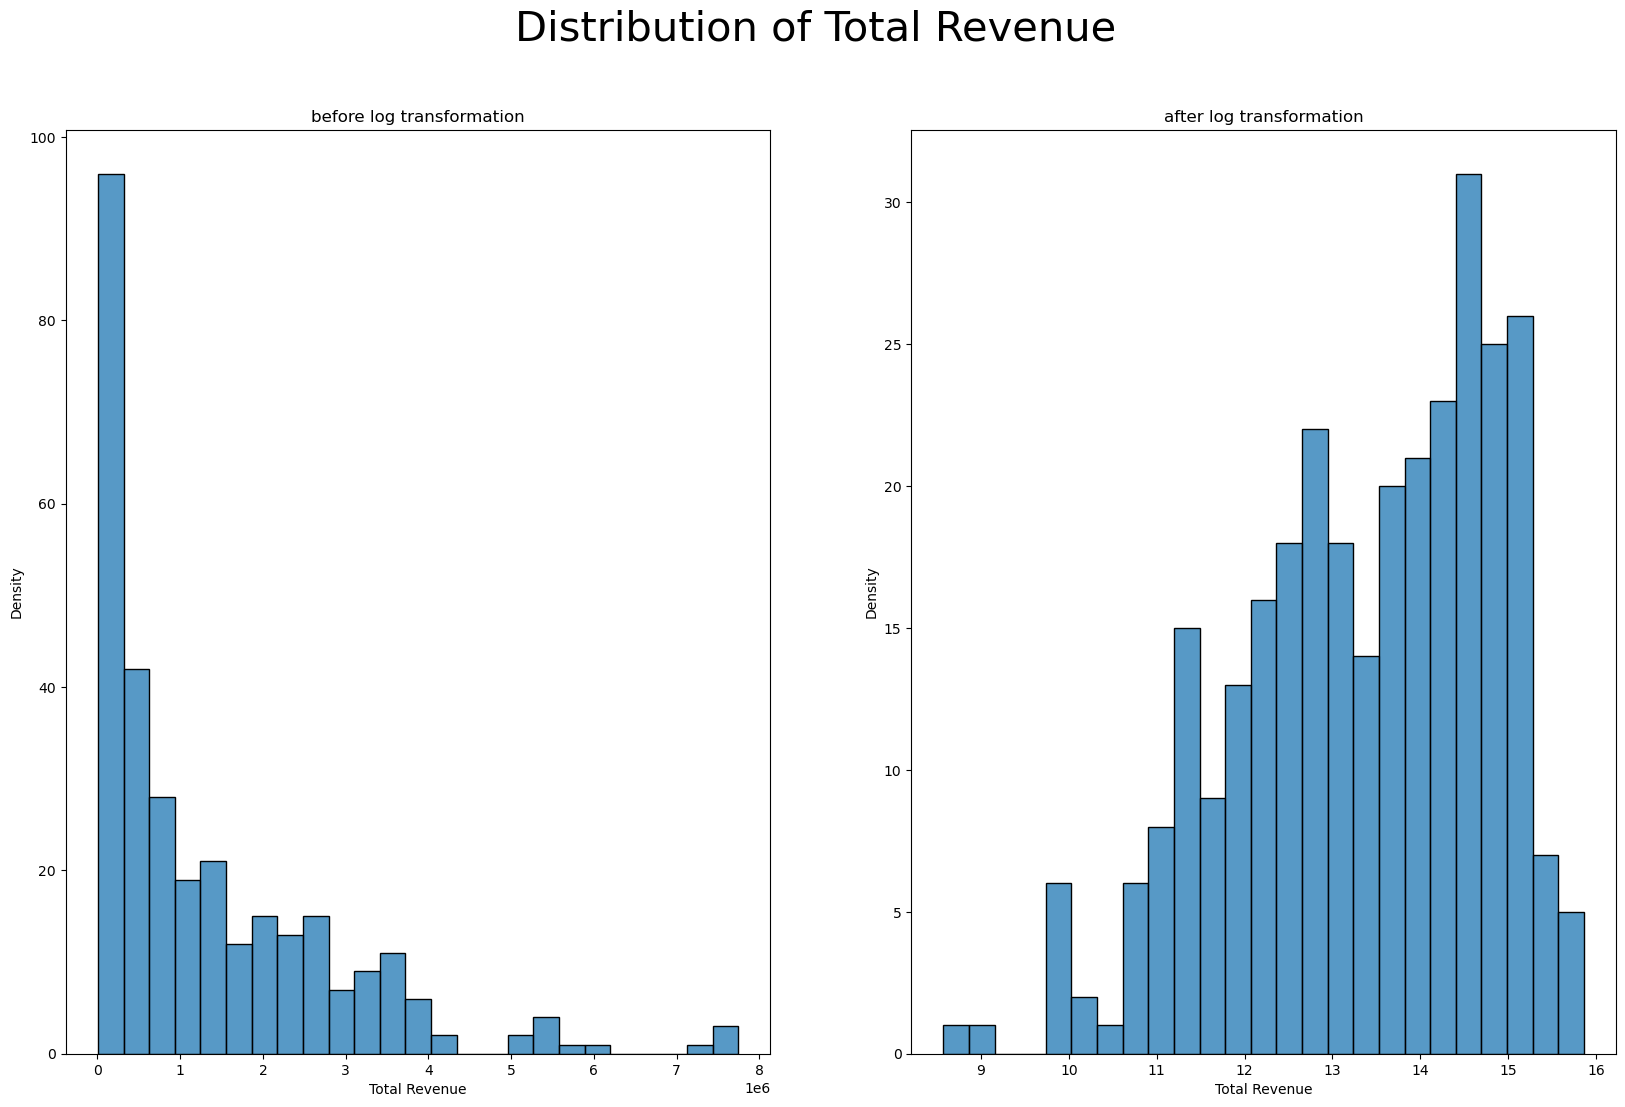

In [58]:
TITLE = 'Distribution of Total Revenue'

# Creating two subplots and figure
fig, (ax_before, ax_after) = plt.subplots(1,2, figsize=(20,12))

# axis before np transformation
sns.histplot(df1['Total Revenue'], bins=25, ax=ax_before)

# axis after Log transformation
sns.histplot(np.log(df1['Total Revenue']), bins=25, ax=ax_after)

ax_before.set(title='before log transformation', xlabel='Total Revenue', ylabel='Density')
ax_after.set(title='after log transformation', xlabel='Total Revenue', ylabel='Density')
fig.suptitle(TITLE, fontsize=30)

So we see that this is not normally distributed, as it has a longer tail on the right. So it's a Right Skewed distribution, where skewness is an asymmetrical measurement of the distribution. For a value of 1.66, that is highly skewed distribution

In [59]:
print('Skewness: %f' % df1['Total Revenue'].skew())

Skewness: 1.667351


If we apply the log transformation of the Total Revenue distribution, it's more distributed with a skewness value of -0.56, which is moderately negative skewed, but close to a fairly symmetrical distribution.

In [60]:
np.log(df1['Total Revenue']).skew()

-0.5571959503165252

Viewing the Correlation Matrix:

<AxesSubplot:>

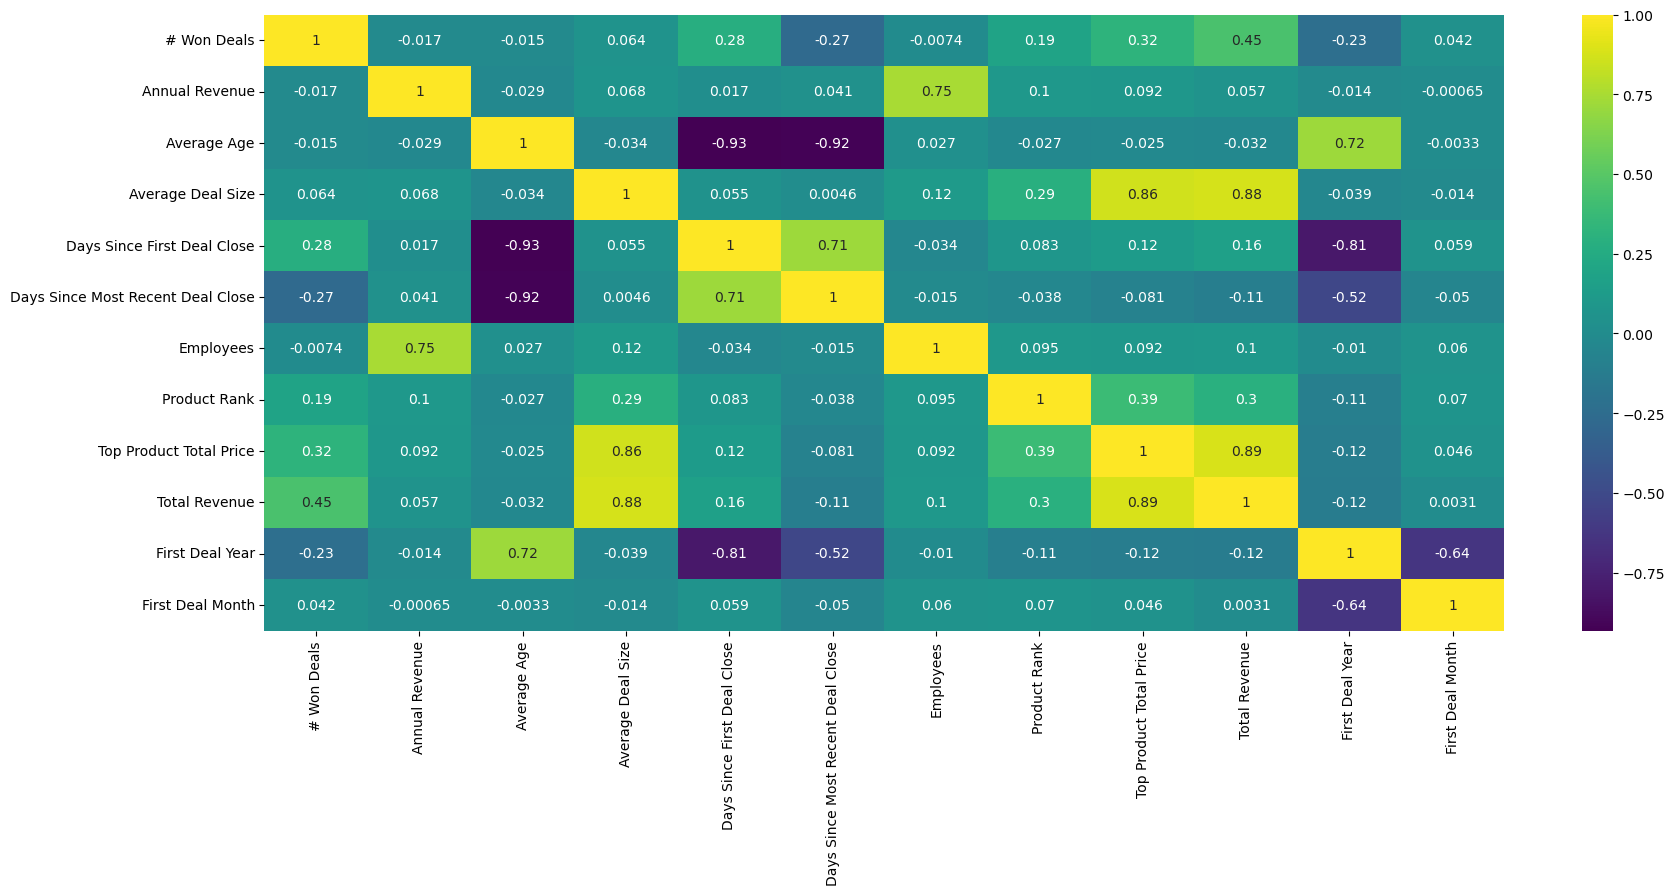

In [61]:
plt.figure(figsize=(20,8))
sns.heatmap(df1.corr(), annot=True, cmap='viridis')

There is a high correlation between the target variable ('Total Revenue') and the following numeric features:
* Top Product Total Price
* Average Deal Size
* Number of Won Deals
* Product Rank

Distribution of the First Deal by Months:

<AxesSubplot:title={'center':'Top Months of the First Deals from 2020-2021'}, xlabel='Month', ylabel='Frequency'>

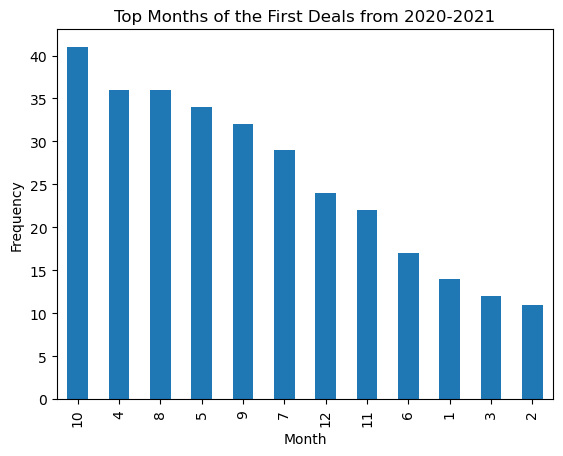

In [62]:
ax = df1['First Deal Month'].value_counts()
ax.plot(kind='bar', title='Top Months of the First Deals from 2020-2021', xlabel='Month',ylabel='Frequency')

Whatever the product is, most of the 'First Deals' occur on October, April, August.
* October is usually the time of Black Friday/Cyber Monday promotions
* April is usually related to Easter promotions
* August is usually related to 'Back to School' promotions


The least sales occur between January to March, it seems.

In [63]:
df['First Deal Date'] = pd.to_datetime(df['First Deal Date'], format = '%Y-%m')
df['First Deal Month'] = df['First Deal Date'].dt.month
Sales = df.groupby(['First Deal Month','Billing Country'])['Total Revenue'].mean().reset_index(name='Total Revenue').round(2)

In [64]:
# !pip install --upgrade nbformat

In [65]:
import plotly.express as px
Sales = df.groupby(['First Deal Month','Billing Country'])['Total Revenue'].mean().reset_index(name='Total Revenue').round(2)
fig = px.line(Sales, x='First Deal Month',y='Total Revenue', color='Billing Country', color_discrete_sequence=px.colors.qualitative.Light24_r)
fig.update_traces(mode='markers+lines')
fig.update_layout(title='Mean Average Revenue per Countries', xaxis_title='Month',yaxis_title='Average Revenue')
fig.show()

This graph is a bit messy, but with plotly, it's interactive where we can hover over these lines to find out the mean revenue of each different country by months... or uncheck the country on the right side of the graph you wish to select. Note, this does not mean that it's the highest total revenue. Need to account for the number of clients as well, which will be shown in a bar graph later
* We can see that the average mean revenue from Singapore peaks on July and October.
* Normway had the highest mean revenue on August
* Most of the mean revenue for each country usually falls under 2.5M Total Revenue
* Brazil stayed stagnant around 3M mean Revenue
* Spain has a linear pattern from January to December, where most mean revenue occurs on December

We can also view te sales of different technologies as well

In [66]:
df['Top Product Family'] = df['Top Product Family'].replace(np.nan,'Others_Family')
Sales = df.groupby(['First Deal Month','Top Product Family'])['Total Revenue'].mean().reset_index(name='Total Revenue').round(2)
fig = px.line(Sales[:], x='First Deal Month',y='Total Revenue', color='Top Product Family', color_discrete_sequence=px.colors.qualitative.Light24_r)
fig.update_traces(mode='markers+lines')
fig.update_layout(title='Mean Revenue by Months per Product Category between 2020-2021', xaxis_title='Month',yaxis_title='Total Revenue')
fig.show()

From this Plotly graph, we note that:
* Most of the total revenue comes from Laptops between 2M - 3M monthly
* The lowest mean revenue is from accessories
* Tablets peaked around Januarry before peaking again around November.
* Digital Media has peaked only on December

In [67]:
df2 = df
fig = px.bar(df2, y='Total Revenue',x='Billing Country')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide',title='Total Revenue by Countries')
fig.show()

Most of the TOTAL revenue comes from Canada(around 110M), followed by the US (85M).

In [68]:
fig = px.bar(df2, y='Total Revenue',x='Billing State/Province')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', title='Total Revenue in the US')
fig.show()

---Drag the bottom of the graph to slightly above the blue bar (hover until you see a + sign, above the states) for better visualization-- 

From the US: Most of the revenue comes from VA and NJ, where the least is TN, KS, and NC

In [69]:
df2 = df
fig = px.bar(df2, y='Total Revenue',x='Top Product Family')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide', title='Total Revenue of Different Product Sectors')
fig.show()

Most of the total revenues come from laptops, followed by tablets.

In [70]:
fig = px.bar(df.sort_values(by=['First Deal Month']),  
            x='Billing Country', y = "Total Revenue", animation_frame="First Deal Month")
fig.update_layout(
    title="Time Lapse of Total Revenue by Country",
    xaxis_title="Month",
    yaxis_title="Total Revenue")

fig.show()

Just a slide animation visualization to find total revenue of different countries by months.\
-Note, you have to keep clicking autoscale on the top right to see the full amount; otherwise, you'll see the previous scaling of the month (before or after)... or go to Month 5 and click autoscale and just slide normally without changing anything
* Canada peaked in Total Revenue on May, July, October and December
* USA peaked in Total Revenue on April, May, July, August, November and December.

#### Feature Selection using SelectKBest using f_regression

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn import metrics

In [72]:
encoder = LabelEncoder()
df1['Account Source'] = encoder.fit_transform(df1['Account Source'])
df1['Account Type'] = encoder.fit_transform(df1['Account Type'])
df1['Owner ID'] = encoder.fit_transform(df1['Owner ID'])
df1['Billing Country'] = encoder.fit_transform(df1['Billing Country'])
df1['Industry'] = encoder.fit_transform(df1['Industry'])
df1['Top Product Family'] = encoder.fit_transform(df1['Top Product Family'])

In [73]:
X = df1.drop(columns='Total Revenue', axis=1)
y = df1['Total Revenue']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(308, 17) (246, 17) (62, 17)


In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression # F-value between label/feature for regression tasks

In [77]:
bestfeatures = SelectKBest(k=10, score_func=f_regression)
fit = bestfeatures.fit(X,y)
df_columns = pd.DataFrame(X.columns)
df_scores = pd.DataFrame(fit.scores_)
#concat the two df
feature_scores_df = pd.concat([df_columns,df_scores],axis=1)
feature_scores_df = feature_scores_df.dropna() #remove the nan from onehotencoders
feature_scores_df.columns = ['Specs','Score']  #naming the dataframe columns
feature_scores_df.nlargest(17,'Score').set_index('Specs') # Ordered feature relevance 

,Score
Specs,
Top Product Total Price,1122.90146
Average Deal Size,1012.43164
# Won Deals,76.99218
Product Rank,29.63887
Days Since First Deal Close,7.86959
First Deal Year,4.81364
Days Since Most Recent Deal Close,4.00065
Employees,3.12712
Billing Country,2.97864


For F-Regression, the higher the value, the more significant the feature is to the model.
\
It seems like the 'Top Product Total Price' is the most important feature and 'First Deal Month' being the least important if expanded.

In [78]:
feature_scores_df[feature_scores_df['Specs']=='Top Product Total Price']

,Specs,Score
14,Top Product Total Price,1122.90146


In [79]:
feature_scores_df[feature_scores_df['Specs']=='# Won Deals']

,Specs,Score
0,# Won Deals,76.99218


In [80]:
df1 = df1.drop(['First Deal Year','Days Since Most Recent Deal Close','Employees','Billing Country','Industry','Owner ID','Annual Revenue','Account Type','Average Age','Account Source','Top Product Family','First Deal Month','Days Since First Deal Close'],axis=1)

In [81]:
df1

,# Won Deals,Average Deal Size,Product Rank,Top Product Total Price,Total Revenue
0,1,1415700,1,1415700,1415700
1,1,1411200,1,1411200,1411200
2,1,3428800,1,1726250,3428800
3,1,1817900,1,1307500,1817900
4,1,3251640,1,2430400,3251640
...,...,...,...,...,...
303,1,89320,1,89320,89320
304,1,874780,1,644500,874780
305,1,638750,1,638750,638750
306,1,1193160,1,1190000,1193160


In [82]:
X = X.drop(['Days Since First Deal Close','First Deal Year','Days Since Most Recent Deal Close','Employees','Billing Country','Industry','Owner ID','Annual Revenue','Account Type','Average Age','Account Source','Top Product Family','First Deal Month'],axis=1)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(308, 4) (246, 4) (62, 4)


In [84]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Selection:

In [85]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

from keras.models import Sequential
from keras.optimizers import SGD

In [86]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('Dec Tree', DecisionTreeRegressor()))
models.append(('KNeigh', KNeighborsRegressor()))
models.append(('SVR',SVR()))
models.append(('RF', RandomForestRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ETR', ExtraTreesRegressor()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('NN', MLPRegressor()))

In [87]:
num_folds = 10
scoring='neg_mean_squared_error'

In [88]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)

    # K-fold Analysis:
    kfold = KFold(n_splits=num_folds)

    # convert MSE to positive. The lower the bettter
    cv_results = -1*cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    cv_results = np.sqrt(cv_results)
    kfold_results.append(cv_results)

    # Full training 
    res = model.fit(X_train, y_train)
    train_result = mean_squared_error(res.predict(X_train), y_train)
    train_result = np.sqrt(train_result)
    train_results.append(train_result)

    # Test results
    test_result = mean_squared_error(res.predict(X_test), y_test)
    test_result = np.sqrt(test_result)
    test_results.append(test_result)

    msg = "%s, %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LR, 363988.307041 (115902.763567) 368599.118813 515976.252885
LASSO, 363988.124935 (115903.345078) 368599.118819 515976.607023
RIDGE, 363340.185347 (117760.559599) 368688.163222 517978.236298
EN, 462273.922773 (185967.504239) 488925.627221 705499.896060
Dec Tree, 357238.975549 (244074.167669) 0.000000 745668.792598
KNeigh, 273093.551819 (109080.068070) 213577.783691 747912.868141
SVR, 1468042.992144 (286616.852655) 1486756.465687 1979562.374031
RF, 306065.393282 (150536.313195) 119920.557572 713705.883339
GBR, 171638.316394 (79932.918296) 35476.298305 566232.745708
ETR, 127808.564534 (72832.149232) 0.000000 568036.611618
ABR, 379660.824476 (128615.339658) 262962.694775 707804.153511
NN, 1881570.133360 (303536.939189) 1904144.140800 2412368.612533


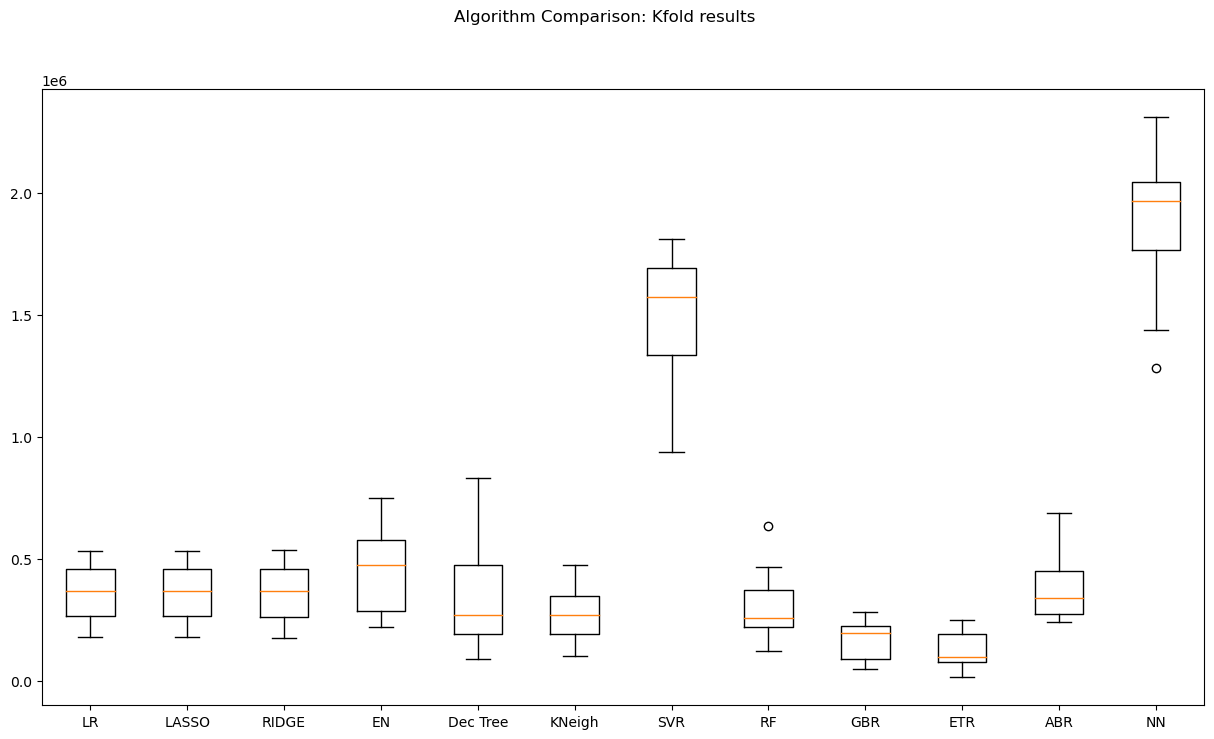

In [89]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

In [90]:
df1['Total Revenue'].median()

788017.5

SVR and Neural Network does not seem to be a good algorithm as the loss is way higher compared to the other selected models. 
GradientBoosting and ExtraTrees seems like a good candidate to proceed towards the model evaluation; however, the Extra Tree MSE value in the train result seems to be zero, which seems off. For GBR, we can see that an average cross validation mean value of $200,000 isn't overwelming if we compare the median value of our target variable: 'Total Revenue', which is $788,000. I'll choose GBR for the model evaluation.

In [91]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train, y_train)

GradientBoostingRegressor()

In [92]:
train_prediction = GBR.predict(X_train)

In [93]:
metrics.r2_score(y_train, train_prediction)

0.9993528094837478

R squared value of 0.99, this is great, but we need to check if it generalized well on the test set

In [94]:
test_pred = GBR.predict(X_test)

In [95]:
metrics.r2_score(y_test, test_pred)

0.901048357636635

R squared value of 0.91, not too bad for prediction on the test set

In [96]:
model = pd.DataFrame({'Actual':y_test, 'Predicted':test_pred})

So with Gradient Boosting, we can see that the model performed well on both the training set and the test set. We can tune it further with GridSearchCV

In [97]:
GradientBoostingRegressor?

Init signature:
GradientBoostingRegressor(
    *,
    loss='squared_error',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
Docstring:     
Gradient Boosting for regression.

This estimator builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage a regression tree is fit on the negative gradient of the given
loss function.

:class:`sklearn.ensemble.HistGradientBoostingRegressor` is a much faster
variant of this algorithm for intermediate datasets (`n_samples >= 10_000`).

Read more in the :ref:`Us

### GridSearchCV

In [98]:
learning_rate = [0.01, 0.05, 0.1, 0.5, 1]
n_estimators = [50,80,100,120,150]
subsample = [0.6, 0.8, 1, 1.2, 1.4]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample)
model = GBR
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', return_train_score=True)
grid_result = grid.fit(X_train, y_train)

In [99]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print('#%d %f (%f) with %r' % (rank, np.sqrt(-mean), np.sqrt(-stdev), param))

Best: -27357672663.716316 using {'learning_rate': 0.1, 'n_estimators': 120, 'subsample': 1}
#75 951260.897734 (nan) with {'learning_rate': 0.01, 'n_estimators': 50, 'subsample': 0.6}
#74 950375.675789 (nan) with {'learning_rate': 0.01, 'n_estimators': 50, 'subsample': 0.8}
#73 949366.797665 (nan) with {'learning_rate': 0.01, 'n_estimators': 50, 'subsample': 1}
#97 nan (nan) with {'learning_rate': 0.01, 'n_estimators': 50, 'subsample': 1.2}
#96 nan (nan) with {'learning_rate': 0.01, 'n_estimators': 50, 'subsample': 1.4}
#70 769423.220531 (nan) with {'learning_rate': 0.01, 'n_estimators': 80, 'subsample': 0.6}
#72 774434.172398 (nan) with {'learning_rate': 0.01, 'n_estimators': 80, 'subsample': 0.8}
#71 770220.795996 (nan) with {'learning_rate': 0.01, 'n_estimators': 80, 'subsample': 1}
#95 nan (nan) with {'learning_rate': 0.01, 'n_estimators': 80, 'subsample': 1.2}
#92 nan (nan) with {'learning_rate': 0.01, 'n_estimators': 80, 'subsample': 1.4}
#69 673714.900997 (nan) with {'learning_ra

In [100]:
# If you want to see it neat
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best score across ALL searched params:\n",np.sqrt(grid.best_score_*-1))
print("\n The best parameters across ALL searched params:\n",grid.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(n_estimators=120, subsample=1)

 The best score across ALL searched params:
 165401.5497621359

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'n_estimators': 120, 'subsample': 1}


Now with the new parameters to set for the GBR, we call the model again

In [101]:
GBR = GradientBoostingRegressor(n_estimators=150)
GBR.fit(X_train, y_train)
new_train_prediction = GBR.predict(X_train)

In [102]:
metrics.r2_score(y_train, new_train_prediction)

0.9997691939519973

In [103]:
new_test_pred = GBR.predict(X_test)
metrics.r2_score(y_test, new_test_pred)

0.9025670620650582

Well, it performed close, but this only slightly worse. But the intuition behind the optimization process is through GridSearchCV. I use it extensively, and with this prediction model, I only changed 1 parameter, so I don't expect it to change significantly. 

In [104]:
from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(y_test, GBR.predict(X_test))
print(final_mse)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

315256583625.9715
561477.1443487005


### *$PREDICT!$*

In [ ]:
random = pd.DataFrame()
random['# Won Deals'] = [1]
random['Average Deal Size'] = [681410]
random['Product Rank'] = [1]
random['Top Product Total Price'] = [654600]

In [128]:
df1.shape[1]-1

4

In [165]:
random1 = random.iloc[0]
random1 = scaler.transform(random1.values.reshape(-1,4))
random1


In [151]:
random1 = random1.reshape(-1,4)

In [152]:
model.predict(random1)

array([709227.7444116])

In [ ]:
random_total_rev = df1.drop('Total Revenue',axis=1).iloc[235]
random_total_rev

In [ ]:
random_total_rev = scaler.transform(random_total_rev.values.reshape(-1,df1.shape[1]-1))

In [175]:
actual = df.iloc[235]['Total Revenue']
mod = model.predict(random_total_rev)
pred = mod.reshape(mod.shape[0])

In [176]:
print(f'actual: [{actual}]')
print(f'predicted: {pred}')

actual: [368530]
predicted: [368935.95579986]


In [171]:
pred-actual

array([3781.47660359])

$50,000 off, ehh. Not bad

Saving the Model:

In [113]:
import pickle
pickle.dump(GBR, open('Total_Rev.pkl','wb'))

In [114]:
with open('Total_Rev.pkl','rb') as f:
    model = pickle.load(f)